In [1]:
from scapy.all import *
from netml.pparser.parser import PCAP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection

/Users/karnbongkotboonriong/opt/anaconda3/lib/python3.9/site-packages/scapy/layers/ipsec.py:471: CryptographyDeprecationWarning: Blowfish has been deprecated
  cipher=algorithms.Blowfish,
/Users/karnbongkotboonriong/opt/anaconda3/lib/python3.9/site-packages/scapy/layers/ipsec.py:485: CryptographyDeprecationWarning: CAST5 has been deprecated
  cipher=algorithms.CAST5,


[ 45  54  55  56  57  58  63  64  68  69  70  71  73  74  76  79  92 102
 103 111 113 142 143 149 150 153 154 155 160 161 162 163 170 173 193 194
 198 201 215 216 217 242 243 244 245 246 247 248 251 256 258 261 262 263
 269 270 273 274 275 283 284 285 292]


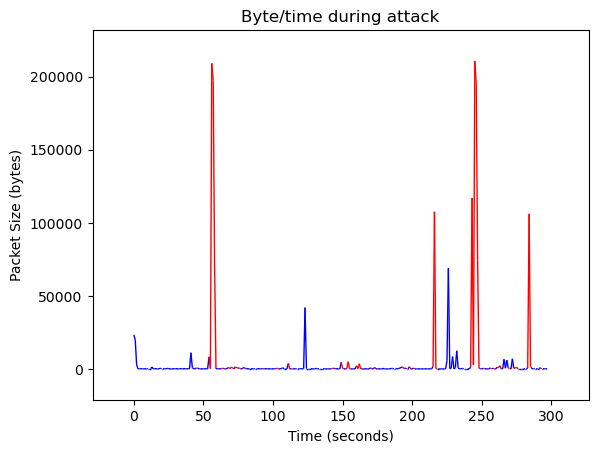

In [2]:
fname = ['mysterysnail','mysterysnail2','printspooler','win32k']
f=3

csv = pd.read_csv('os_attacks/'+fname[f]+'.csv')
timestamps = len(np.unique(csv['time']))

psize = []
for i in range(timestamps):
    temp = csv[csv['time'] == i]
    psize.append([i,sum(temp['length'].apply(int)),sum(temp['attack'].apply(int))])

psize = np.asarray(psize)
attack = psize[:,0::2]
attack_time = np.asarray(np.where(attack[:,1] > 0))[0]
print(attack_time)

x = range(psize.shape[0])
y = psize[:,1]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cm = dict(zip(range(0,2,1),list("br")))
colors = list( map( cm.get , np.isin(x,attack_time) ))

lc = LineCollection(segments, colors=colors, linewidths= 1)
fig, ax = plt.subplots()
ax.add_collection(lc)

ax.autoscale()
ax.margins(0.1)
plt.xlabel('Time (seconds)')
plt.ylabel('Packet Size (bytes)')
plt.title('Byte/time during attack')
plt.savefig('plot/malware/'+fname[f]+'_bpt.pdf')  
plt.show()

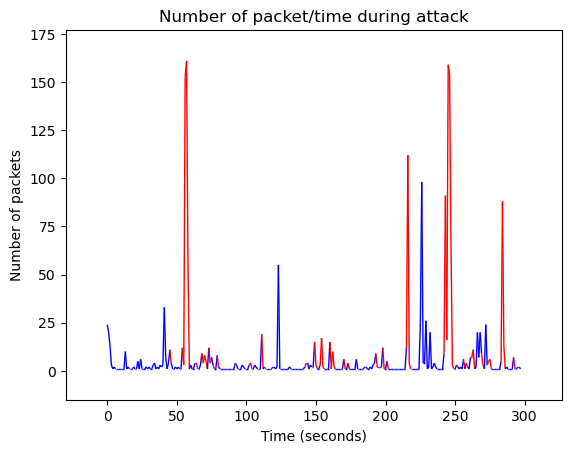

In [3]:
pkt = []
for i in range(timestamps):
    pkt.append([i,np.count_nonzero(csv['time'] == i)])
    
pkt = np.asarray(pkt)

x = pkt[:,0]
y = pkt[:,1]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cm = dict(zip(range(0,2,1),list("br")))
colors = list( map( cm.get , np.isin(x,attack_time) ))

lc = LineCollection(segments, colors=colors, linewidths= 1)
fig, ax = plt.subplots()
ax.add_collection(lc)

ax.autoscale()
ax.margins(0.1)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of packets')
plt.title('Number of packet/time during attack')
plt.savefig('plot/malware/'+fname[f]+'_pkt.pdf')
plt.show()

[]


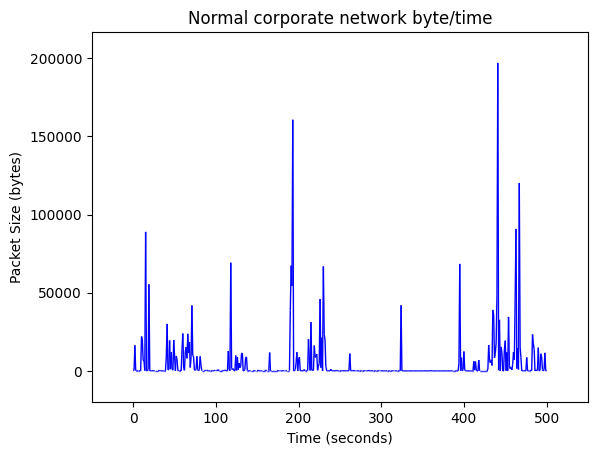

In [84]:
normal = pd.read_csv('os_attacks/os_normal.csv')
timestamps = len(np.unique(normal['time']))

psize = []
for i in range(timestamps):
    temp = normal[normal['time'] == i]
    psize.append([i,sum(temp['length'].apply(int)),sum(temp['attack'].apply(int))])

psize = np.asarray(psize)
psize = psize[np.where(psize[:,1] < 400000)]
attack = psize[:,0::2]
attack_time = np.asarray(np.where(attack[:,1] > 0))[0]
print(attack_time)

x = range(psize.shape[0])
y = psize[:,1]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cm = dict(zip(range(0,2,1),list("br")))
colors = list( map( cm.get , np.isin(x,attack_time) ))

lc = LineCollection(segments, colors=colors, linewidths= 1)
fig, ax = plt.subplots()
ax.add_collection(lc)

ax.autoscale()
ax.margins(0.1)
plt.xlabel('Time (seconds)')
plt.ylabel('Packet Size (bytes)')
plt.title('Normal corporate network byte/time')
plt.savefig('plot/malware/baseline_bpt_small.pdf')  
plt.show()

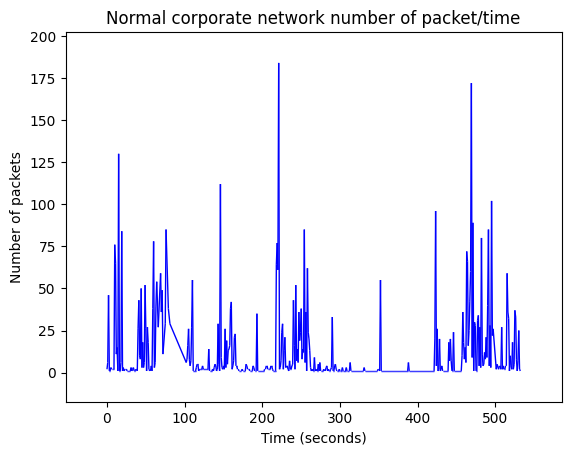

In [88]:
pkt = []
for i in range(timestamps):
    pkt.append([i,np.count_nonzero(normal['time'] == i)])
    
pkt = np.asarray(pkt)
pkt = pkt[np.where(pkt[:,1] < 400)]

x = pkt[:,0]
y = pkt[:,1]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cm = dict(zip(range(0,2,1),list("br")))
colors = list( map( cm.get , np.isin(x,attack_time) ))

lc = LineCollection(segments, colors=colors, linewidths= 1)
fig, ax = plt.subplots()
ax.add_collection(lc)

ax.autoscale()
ax.margins(0.1)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of packets')
plt.title('Normal corporate network number of packet/time')
plt.savefig('plot/malware/baseline_pkt_small.pdf')
plt.show()